In [1]:
import pandas as pd
import matplotlib.pyplot as plt        #reading libraries
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import warnings 

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)                             #reading dataset
df = pd.read_csv("./data.csv")

In [3]:
print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().sum())
df[df.isnull().any(axis=1)]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(511, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [4]:
df2 = df.dropna() #removing rows with na
df2.shape

(506, 14)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


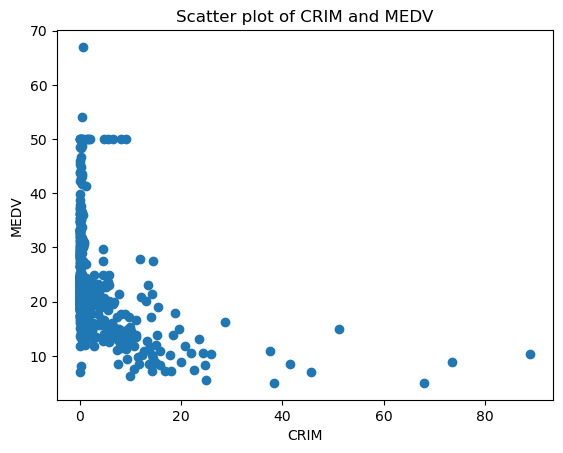

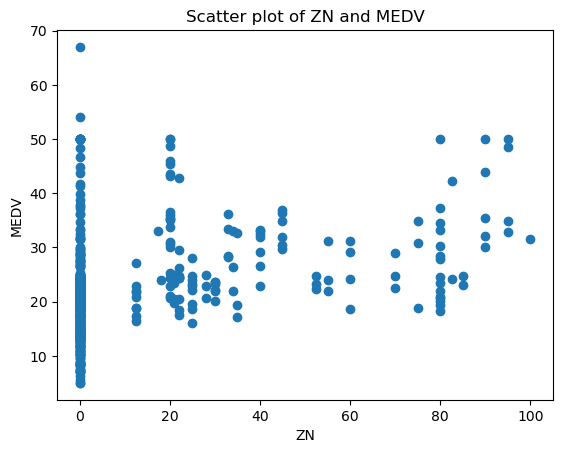

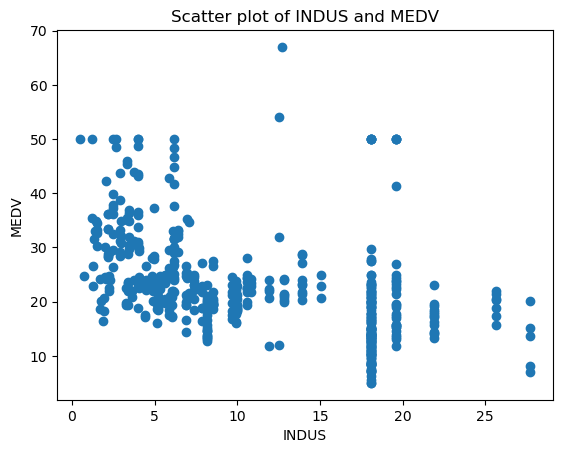

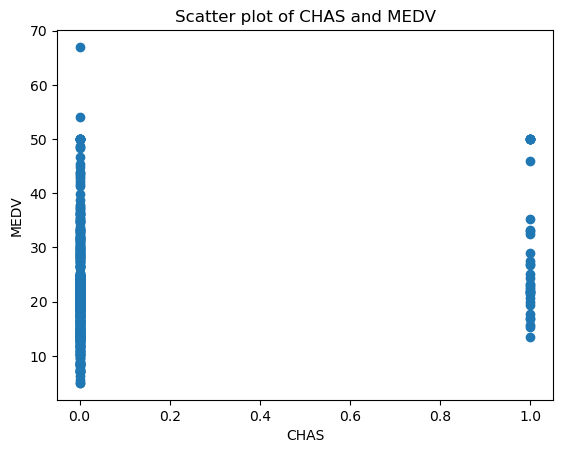

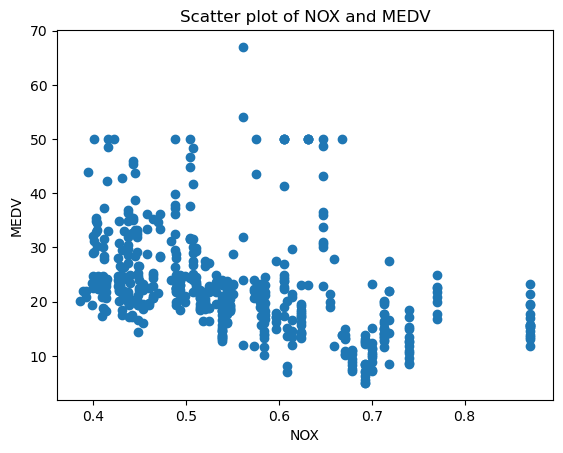

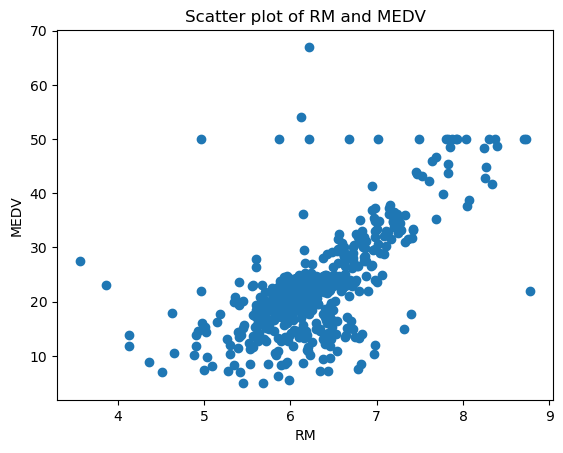

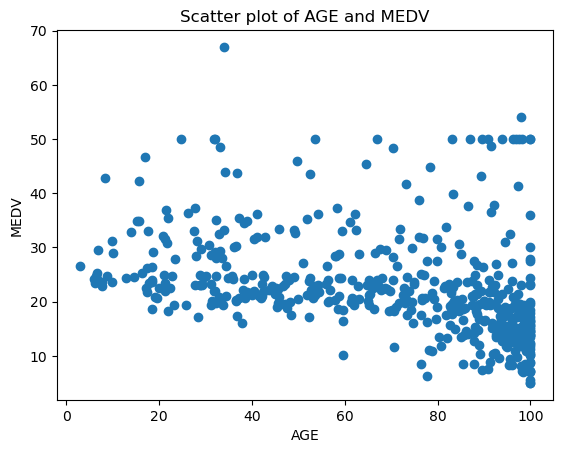

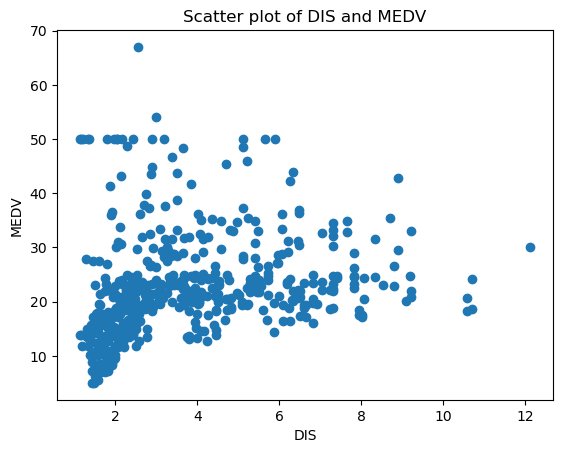

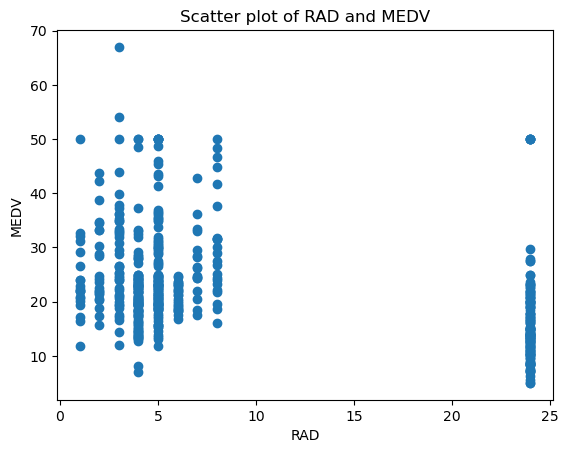

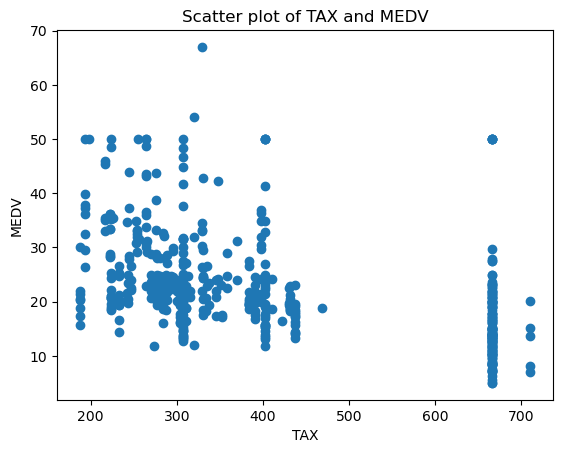

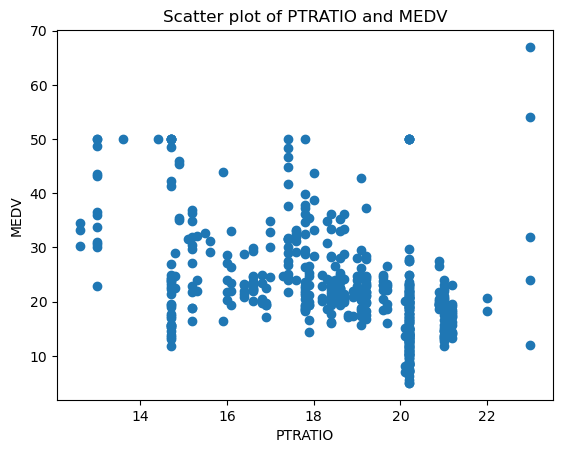

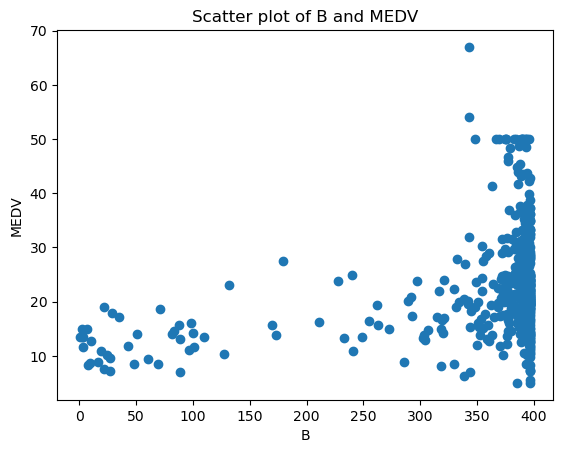

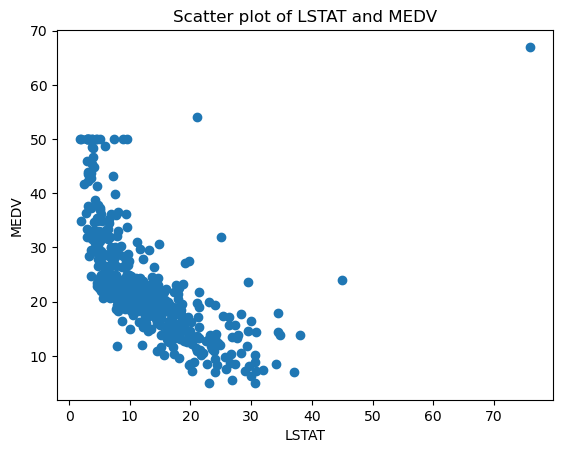

In [5]:
print(df2.columns[0:13])
x_names = df2.columns[0:13]           # ploting all x variables with y 
y_name = df2.columns[-1]
def pllot(x,y):
  plt.scatter(df2[x],df2[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title("Scatter plot of "+x+" and "+y)
  plt.show()
for i in x_names:
  pllot(i, y_name)

In [6]:
def outliers(x):                       # removing outliers
  l_b = x.mean()-3*x.std() 
  u_b = x.mean()+3*x.std()
  x_u = x.index[x>u_b]
  x_l = x.index[x<l_b]
  x[x_u] = max(x.drop(x_u, axis=0))
  x[x_l] = min(x.drop(x_l, axis=0))
  return x
for i in x_names:
  if i != 'CHAS':
    df2[i] = outliers(df2[i])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.26,0.51,0.06,0.53,0.29,0.44,0.47,0.78,0.73,0.34,0.45,0.55,0.45
ZN,0.26,1.00,0.54,0.04,0.52,0.31,0.57,0.67,0.31,0.32,0.40,0.18,0.42,0.33
INDUS,0.51,0.54,1.00,0.06,0.76,0.40,0.64,0.72,0.59,0.72,0.38,0.37,0.60,0.47
CHAS,0.06,0.04,0.06,1.00,0.09,0.09,0.09,0.10,0.01,0.04,0.12,0.05,0.06,0.16
NOX,0.53,0.52,0.76,0.09,1.00,0.31,0.73,0.78,0.61,0.67,0.19,0.39,0.58,0.41
RM,0.29,0.31,0.40,0.09,0.31,1.00,0.24,0.21,0.21,0.29,0.34,0.14,0.60,0.68
AGE,0.44,0.57,0.64,0.09,0.73,0.24,1.00,0.76,0.46,0.51,0.26,0.28,0.58,0.37
DIS,0.47,0.67,0.72,0.10,0.78,0.21,0.76,1.00,0.50,0.54,0.25,0.30,0.50,0.24
RAD,0.78,0.31,0.59,0.01,0.61,0.21,0.46,0.50,1.00,0.91,0.44,0.44,0.47,0.38
TAX,0.73,0.32,0.72,0.04,0.67,0.29,0.51,0.54,0.91,1.00,0.44,0.44,0.53,0.46


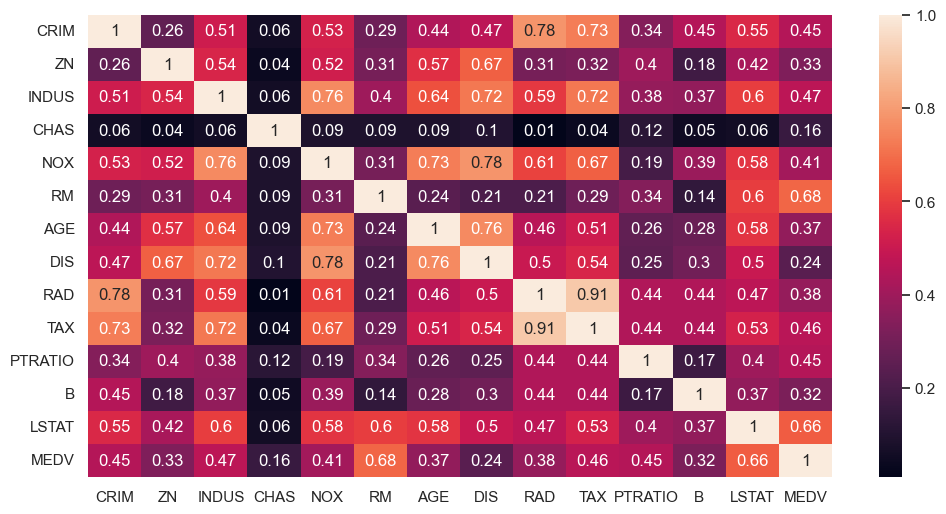

In [7]:
cor_matrix = df2.corr().abs().round(2)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data=cor_matrix , annot=True)
cor_matrix

[0.47558753766600886, 0.11439516307063949, 0.09279793427471118, 0.07117525816824916, 0.06375506816805449, 0.05274731412029705, 0.03561765427361978, 0.03115330089156532, 0.011696123793502985, 0.019321514675140337, 0.015400592194325134, 0.01635253870388587]
[0.47558753766600886, 0.5899827007366484, 0.6827806350113595, 0.7539558931796086, 0.8177109613476632, 0.8704582754679603, 0.90607592974158, 0.9372292306331453, 0.9489253544266483, 0.9682468691017886, 0.9836474612961137, 0.9999999999999996]


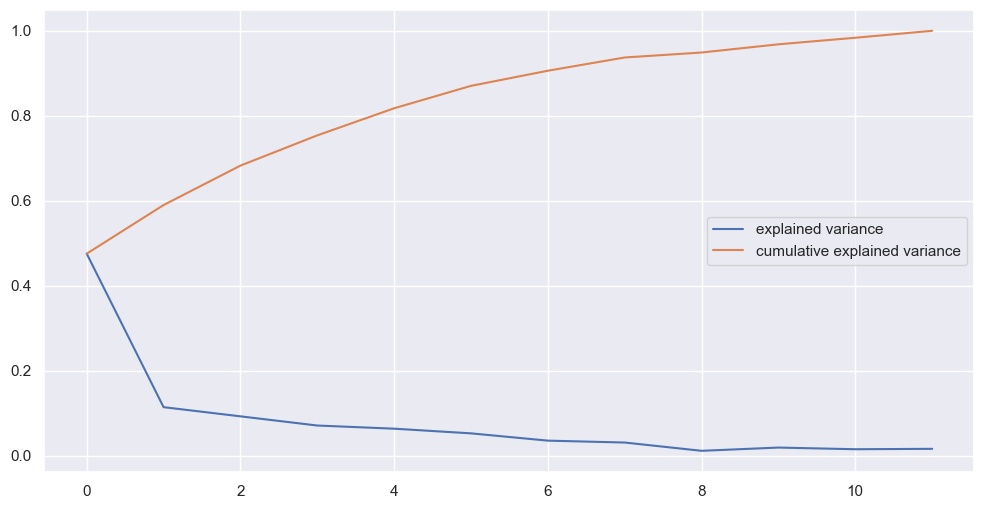

In [8]:
x_names = x_names.drop("RAD")
x_scaled = StandardScaler().fit_transform(df2[x_names])
features = x_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
cum_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
    cum_variances.append(sum(explained_variances))
 
print(explained_variances)
print(cum_variances)
plt.plot(explained_variances, label = "explained variance")
plt.plot(cum_variances, label = "cumulative explained variance")
plt.legend(loc = "right")

In [9]:
x_train,x_test,y_train,y_test= train_test_split(df2[x_names],df2[y_name],test_size=0.3,random_state=1)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     62.80
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           9.04e-79
Time:                        09:28:56   Log-Likelihood:                -1116.8
No. Observations:                 354   AIC:                             2260.
Df Residuals:                     341   BIC:                             2310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3692      7.483      1.920      0.0

Text(0, 0.5, 'Real values')

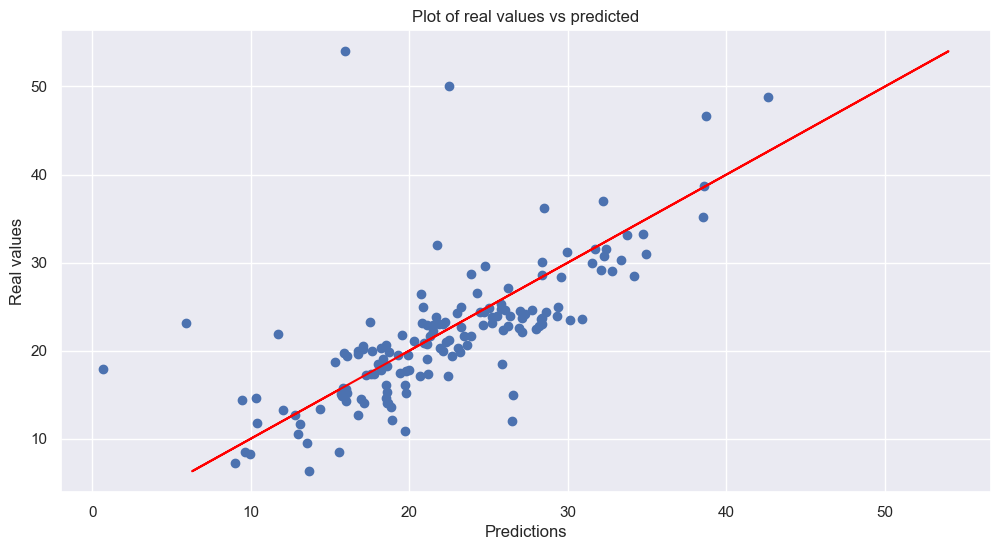

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)
#print(model.intercept_)
#print(model.coef_)
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())
y_pred_train1 = model.predict(x_train)
y_pred_test1 = model.predict(x_test)
print("MSE train", round(mean_squared_error(y_train,y_pred_train1),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train1),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train1)),2))
print("MSE test", round(mean_squared_error(y_test,y_pred_test1),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test1),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test1)),2))
score = cross_val_score(model,x_train,y_train, scoring ="r2" ,cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1),n_jobs=-1)
print("Average value of r2 score for cross validation was equal to {}.".format(round(score.mean(),4)))
plt.scatter(y_pred_test1, y_test)
plt.plot(y_test, y_test, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')

In [11]:
model2 = SVR()
kernel = ["linear","sigmoid","rbf","poly"]
tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
C = [1, 1.5, 2, 2.5, 3, 4, 5]
grid = dict(kernel=["linear"], tol=tolerance, C=C)
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
gridSearch = GridSearchCV(estimator=model2, param_grid=grid, n_jobs=-1,
	cv=cvFold, scoring="neg_mean_squared_error")
searchResults = gridSearch.fit(x_train_scaled, y_train)
bestModel = searchResults.best_estimator_

MSE train 34.43
MAE train 3.38
RMSE train 5.87
MSE test 36.08
MAE test 3.62
RMSE test 6.01
SVR(C=1, kernel='linear')


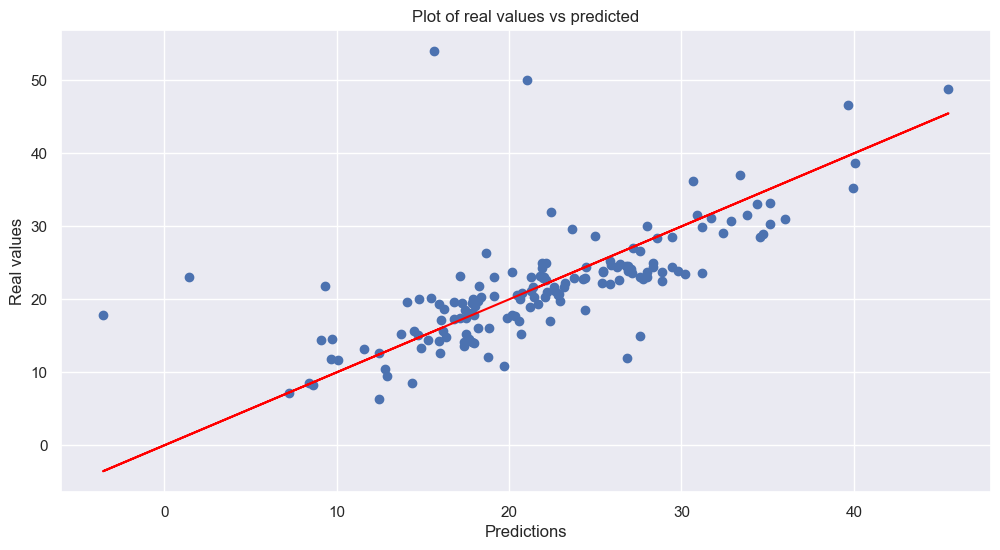

Text(0.5, 1.0, 'Plot of variable improtance for SVR')

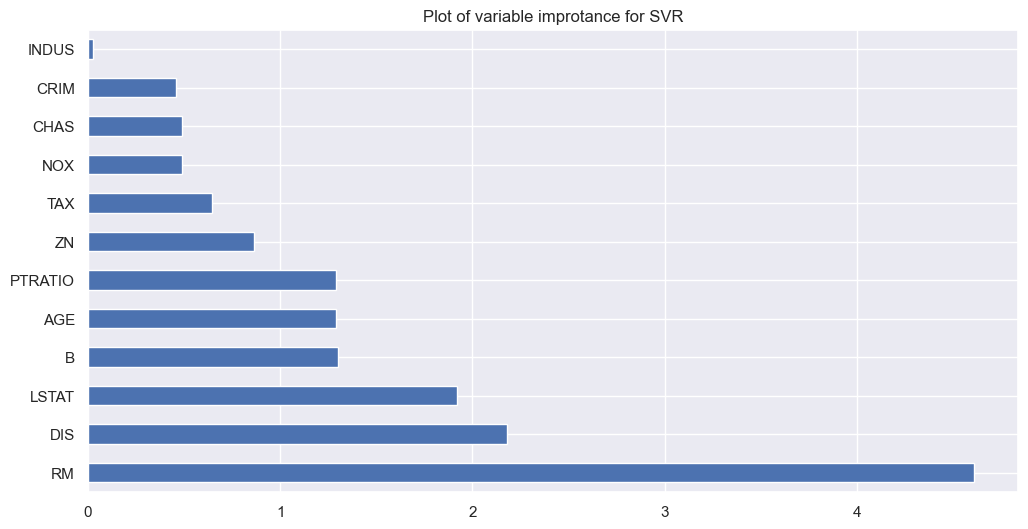

In [12]:
y_pred_train2 = bestModel.predict(x_train_scaled)
y_pred_test2 = bestModel.predict(x_test_scaled)
print("MSE train", round(mean_squared_error(y_train,y_pred_train2),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train2),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train2)),2))
print("MSE test", round(mean_squared_error(y_test,y_pred_test2),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test2),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test2)),2))
print(bestModel)
plt.scatter(y_pred_test2, y_test)
plt.plot(y_pred_test2, y_pred_test2, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()
pd.Series(abs(bestModel.coef_[0]), index=x_names).nlargest(12).plot(kind='barh')
plt.title("Plot of variable improtance for SVR")

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[25,50,100,200],'learning_rate':[0.15,0.1,0.05,0.01]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=cv)
search_fit = search.fit(x_train_scaled, y_train)
best_model_gbr = search_fit.best_estimator_

MSE train 34.43
MAE train 3.38
RMSE train 5.87
MSE test 16.75
MAE test 2.69
RMSE test 4.09
GradientBoostingRegressor()


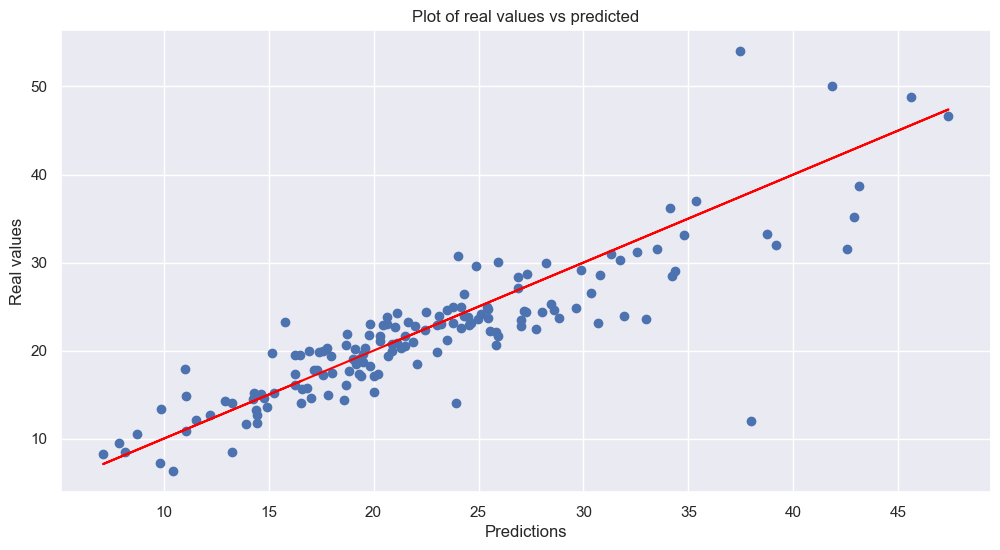

Text(0.5, 1.0, 'Plot of variable improtance for GBR')

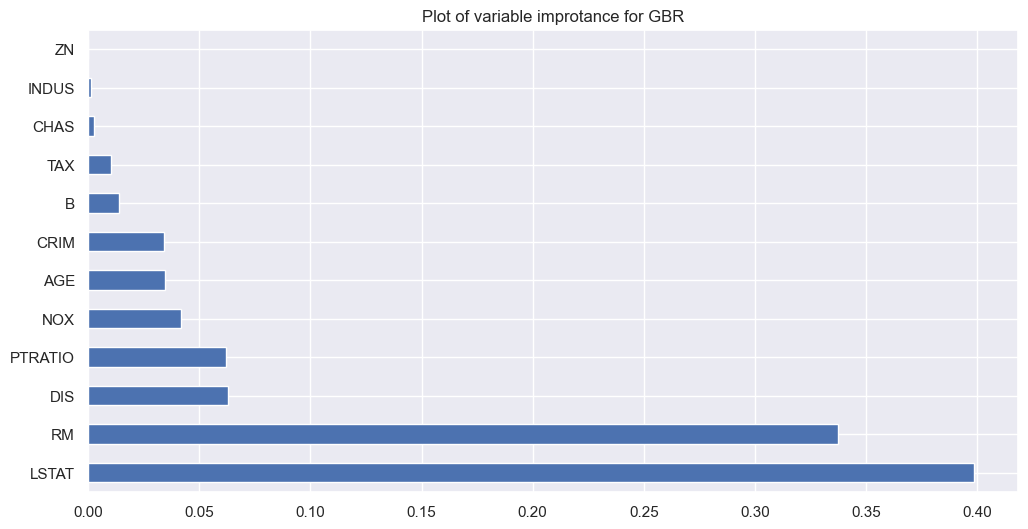

In [14]:
y_pred_train3 = bestModel.predict(x_train_scaled)
print("MSE train", round(mean_squared_error(y_train,y_pred_train3),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train3),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train3)),2))
y_pred_test3 = best_model_gbr.predict(x_test_scaled)
print("MSE test", round(mean_squared_error(y_test,y_pred_test3),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test3),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test3)),2))
print(best_model_gbr)

plt.scatter(y_pred_test3, y_test)
plt.plot(y_pred_test3, y_pred_test3, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()
pd.Series(abs(best_model_gbr.feature_importances_), index=x_names).nlargest(12).plot(kind='barh')
plt.title("Plot of variable improtance for GBR")